## Fraudulent Transactions Detection.
In this notebook , we are developing a model for predicting fraudulent transactions and gain insights for future improvements.

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier , RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [3]:
# reading the data into a pandas dataframe
Data = pd.read_csv("Fraud.csv")

In [4]:
#print the first five rows
Data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
Data.shape

(6362620, 11)

## Data Cleaning

In [6]:
# Checking for null values inside the data
Data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

No null values are present

In [7]:
# General stastical information about the dataset
Data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
# Checking the data type of different data columns
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


The Data type of each column is also verified.

In [9]:
Data_numerical = Data.select_dtypes(include=[np.number])
correlation_matrix = Data_numerical.corr()

In [10]:
# Checking for negative values
negative_values_data = Data_numerical < 0
print("Any column has negative values:", negative_values_data.any().any())


Any column has negative values: False


## Removing Outliers

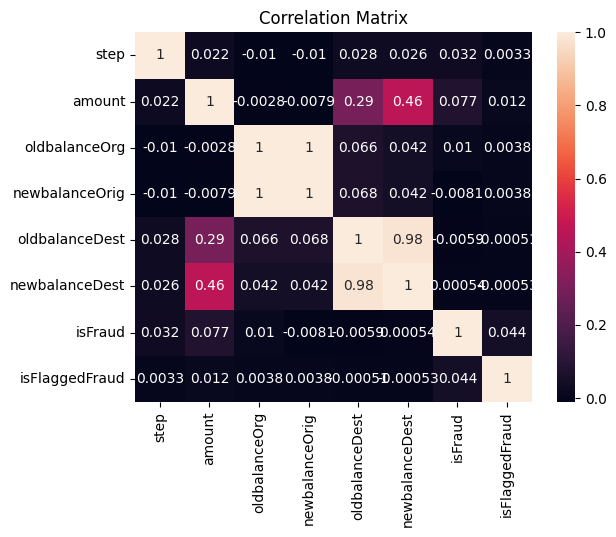

In [12]:
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

<Axes: ylabel='step'>

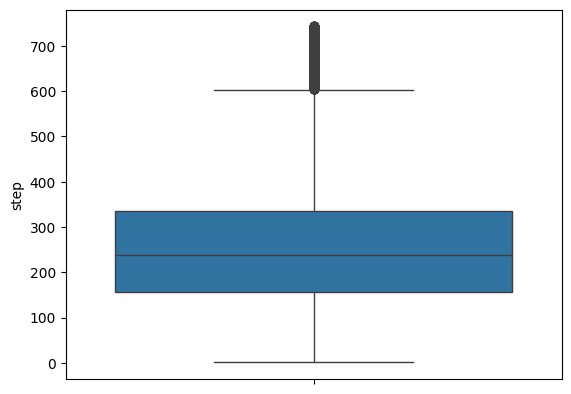

In [13]:
sns.boxplot(Data['step'])

In [11]:
#finding the threshold
Q1 = Data['step'].quantile(0.25)
Q3 = Data['step'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower bounds:\n", lower_bound)
print("Upper bounds:\n", upper_bound)

Lower bounds:
 -112.5
Upper bounds:
 603.5


In [12]:
# Removing the outliers
df = Data[Data['step'] <= 603.5]

In [13]:
df.shape

(6259932, 11)

<Axes: >

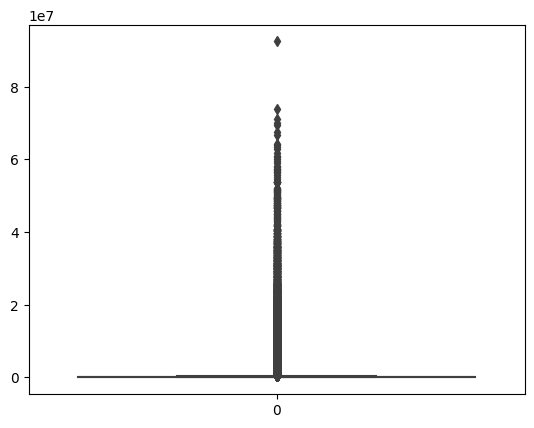

In [14]:
sns.boxplot(df['amount'])

In [14]:
#finding the threshold
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower bounds:\n", lower_bound)
print("Upper bounds:\n", upper_bound)

Lower bounds:
 -279631.29
Upper bounds:
 501793.53


In [15]:
# Removing the outliers
df = Data[Data['amount'] <= 438794.90249999997]

In [16]:
df.shape

(5923809, 11)

<Axes: >

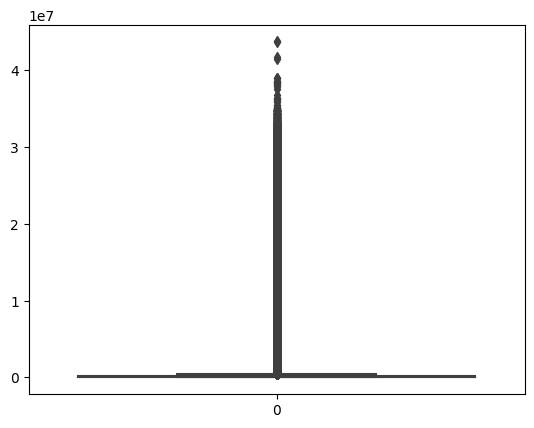

In [18]:
sns.boxplot(df['newbalanceOrig'])

In [17]:
#finding the threshold
Q1 = df['newbalanceOrig'].quantile(0.25)
Q3 = df['newbalanceOrig'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower bounds:\n", lower_bound)
print("Upper bounds:\n", upper_bound)

Lower bounds:
 -239400.75
Upper bounds:
 399001.25


In [18]:
df = df[df['amount'] <= 399001.25]

In [19]:
df.shape

(5830632, 11)

As visible from the heatmap,oldbalanceOrg and newbalanceOrig ; newbalanceDest and oldbalanceDest are highly correlated.</BR>
Let's plot them against each other.

<Axes: xlabel='oldbalanceOrg', ylabel='newbalanceOrig'>

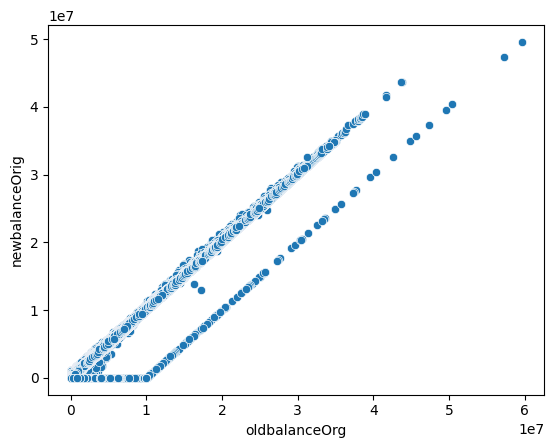

In [23]:
sns.scatterplot(x = Data['oldbalanceOrg'] , y = Data['newbalanceOrig'] )

<Axes: xlabel='oldbalanceDest', ylabel='newbalanceDest'>

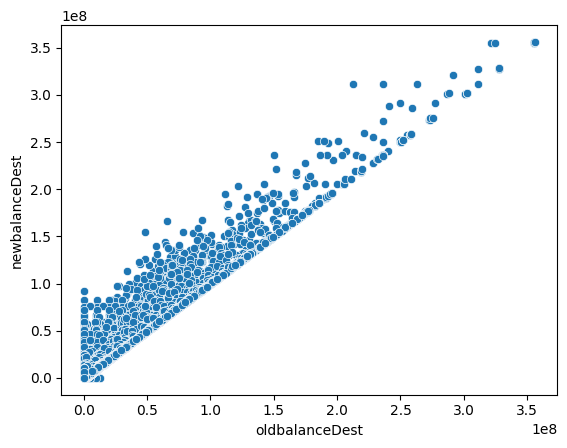

In [24]:
sns.scatterplot(x = Data['oldbalanceDest'] , y = Data['newbalanceDest'] )

The above graphs confirms the correlation between these values.

In [42]:
label_encoder = LabelEncoder()

# Apply label encoding to 'type' column
df['type'] = label_encoder.fit_transform(df['type'])

# Apply label encoding to 'type' column
df['nameOrig'] = label_encoder.fit_transform(df['nameOrig'])

In [21]:
# # One-Hot Encoding using pd.get_dummies()
# Data_encoded = pd.get_dummies(Data, columns=['type', 'nameOrig'])
# Data = pd.concat([Data, Data_encoded], axis=1)

# # Drop the original categorical columns if needed
# Data.drop(columns=['type', 'nameOrig'], inplace=True)

In [43]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,695301,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,1864.28,2006616,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,919098,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,5342065,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,3,11668.14,3158650,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Feature Selection

Since we want to detect the Fraud , our **target variable** is **isFraud** .

Lets find which factors influence target variable the most.

In [41]:
df.corrwith(df['isFraud'])

step              0.031578
type              0.020833
amount            0.076688
nameOrig         -0.000464
oldbalanceOrg     0.010154
newbalanceOrig   -0.008148
oldbalanceDest   -0.005885
newbalanceDest    0.000535
isFraud           1.000000
isFlaggedFraud    0.044109
dtype: float64

Let's plot the variables having the least correlation with the target variable.

In [73]:
# #Create subplots
# fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# #boxplot
# sns.boxplot(x='isFraud', y='oldbalanceDest', data=df, ax=axs[0, 0])
# axs[0,0].set_title("isFraud vs oldbalanceDest")
# axs[0,0].set_xlabel("isFraud")
# axs[0,0].set_ylabel("oldbalanceDest")

# #violinplot
# sns.violinplot(x='isFraud', y='oldbalanceOrg', data=df, ax=axs[0, 1])
# axs[0,1].set_title("isFraud vs oldbalanceOrg")
# axs[0,1].set_xlabel("isFraud")
# axs[0,1].set_ylabel("oldbalanceOrg")

# #barplot
# sns.barplot(x='isFraud', y='newbalanceDest', data=df, ax=axs[1, 0], estimator=np.mean)
# axs[1,0].set_title("isFraud vs newbalanceDest")
# axs[1,0].set_xlabel("isFraud")
# axs[1,0].set_ylabel("newbalanceDest")

# #scatterplot
# sns.scatterplot(x='isFraud', y='newbalanceOrig', data=df, ax=axs[1, 1])
# axs[1,1].set_title("isFraud vs newbalanceOrig")
# axs[1,1].set_xlabel("isFraud")
# axs[1,1].set_ylabel("newbalanceOrig")



Variables such as **oldbalanceDest** , **newbalanceDest** , **nameOrig** have a very low correlation with our target variable these will not be used for **prediction**.

In [44]:
#Separating the dataset into target variable and independent variables.
X = df[['step','amount' , 'type','oldbalanceOrg','newbalanceOrig', 'isFlaggedFraud']]
Y = df[['isFraud']]

In [45]:
X_lim = X.head(15000)
X_lim.shape

(15000, 6)

In [46]:
Y_lim = Y.head(15000)
Y_lim.shape

(15000, 1)

## Train Test Split

In [47]:
# Performing the train test split on the data

x_train , x_test , y_train, y_test = train_test_split(X_lim , Y_lim , test_size= 0.3 , random_state = 42)

In [48]:
x_train.shape

(10500, 6)

In [49]:
x_test.shape

(4500, 6)

In [50]:
y_train = y_train.to_numpy().reshape(-1)
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
y_test = y_test.to_numpy().reshape(-1)
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Model Development

In [52]:
#LogisticRegression
lr = LogisticRegression()
lr.fit(x_train , y_train)
y_pred_lr = lr.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression : Accuracy = {accuracy_lr}")

Logistic Regression : Accuracy = 0.9966666666666667


In [53]:
#DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train , y_train)
y_pred_dt = dt.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree : Accuracy = {accuracy_dt}")

Decision Tree : Accuracy = 0.9964444444444445


In [54]:
# KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train , y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"K Nearest Neighbours: Accuracy = {accuracy_knn}")

K Nearest Neighbours: Accuracy = 0.9955555555555555


In [75]:
#RandomForestClassifier
rd = RandomForestClassifier()
rd.fit(x_train , y_train)
y_pred_rd = rd.predict(x_test)
accuracy_rd = accuracy_score(y_test, y_pred_rd)
print(f"K Nearest Neighbours: Accuracy = {accuracy_rd}")

K Nearest Neighbours: Accuracy = 0.9966666666666667


In [56]:
# GradientBoostingClassifier
gd = GradientBoostingClassifier()
gd.fit(x_train , y_train)
y_pred_gd = gd.predict(x_test)
accuracy_gd = accuracy_score(y_test, y_pred_gd)
print(f"Gradient Boosting Classifier: Accuracy = {accuracy_gd}")

Gradient Boosting Classifier: Accuracy = 0.9964444444444445


## Optimization

Lets optimize the parameters of these models for further improvement in prediction.

In [57]:
 # Define parameter grids
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [58]:
# Initialize and perform Grid Search
lr = LogisticRegression()
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, n_jobs=-1, scoring='roc_auc')
grid_search_lr.fit(x_train, y_train)

# Get the best Logistic Regression model
best_lr = grid_search_lr.best_estimator_
print(f"Best parameters for Logistic Regression: {grid_search_lr.best_params_}")

Best parameters for Logistic Regression: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [59]:
# Initialize and perform Grid Search
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, n_jobs=-1, scoring='roc_auc')
grid_search_knn.fit(x_train, y_train)

# Get the best KNN model
best_knn = grid_search_knn.best_estimator_
print(f"Best parameters for KNN: {grid_search_knn.best_params_}")


Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}


In [60]:
# Initialize and perform Grid Search
dt = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, n_jobs=-1, scoring='roc_auc')
grid_search_dt.fit(x_train, y_train)

# Get the best Decision Tree model
best_dt = grid_search_dt.best_estimator_
print(f"Best parameters for Decision Tree: {grid_search_dt.best_params_}")

Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [61]:
# Initialize and perform Grid Search
x_train_lim = x_train.head(1000)
y_train_lim = y_train[:1000]
x_test_lim = x_test.head(1000)
y_test_lim = y_test[:1000]
rf = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring='roc_auc')
grid_search_rf.fit(x_train_lim, y_train_lim)

# Get the best Random Forest model
best_rf = grid_search_rf.best_estimator_
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")


Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [62]:
# Initialize and perform Grid Search
x_train_lim = x_train.head(1000)
y_train_lim = y_train[:1000]
x_test_lim = x_test.head(1000)
y_test_lim = y_test[:1000]
gb = GradientBoostingClassifier()
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, n_jobs=-1, scoring='roc_auc')
grid_search_gb.fit(x_train_lim, y_train_lim)

# Get the best Gradient Boosting model
best_gb = grid_search_gb.best_estimator_
print(f"Best parameters for Gradient Boosting: {grid_search_gb.best_params_}")


Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


## Model Evaluation

In [63]:
# Logistic Regression Evaluation
y_pred_lr = best_lr.predict(x_test)
y_pred_proba_lr = best_lr.predict_proba(x_test)[:, 1]
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Logistic Regression ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_lr))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Logistic Regression Accuracy Score:", accuracy_lr)


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4484
           1       0.88      0.88      0.88        16

    accuracy                           1.00      4500
   macro avg       0.94      0.94      0.94      4500
weighted avg       1.00      1.00      1.00      4500

Logistic Regression ROC-AUC Score: 0.9999442462087422
Logistic Regression Confusion Matrix:
 [[4482    2]
 [   2   14]]
Logistic Regression Accuracy Score: 0.9991111111111111


In [64]:
# KNN Evaluation
y_pred_knn = best_knn.predict(x_test)
y_pred_proba_knn = best_knn.predict_proba(x_test)[:, 1]
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("KNN ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_knn))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("KNN Accuracy Score:", accuracy_knn)


KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4484
           1       0.64      0.88      0.74        16

    accuracy                           1.00      4500
   macro avg       0.82      0.94      0.87      4500
weighted avg       1.00      1.00      1.00      4500

KNN ROC-AUC Score: 0.999414585191793
KNN Confusion Matrix:
 [[4476    8]
 [   2   14]]
KNN Accuracy Score: 0.9977777777777778


In [65]:
# Random Forest Evaluation
y_pred_rf = best_rf.predict(x_test)
y_pred_proba_rf = best_rf.predict_proba(x_test)[:, 1]
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest Accuracy Score:", accuracy_rf)


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4484
           1       0.00      0.00      0.00        16

    accuracy                           1.00      4500
   macro avg       0.50      0.50      0.50      4500
weighted avg       0.99      1.00      0.99      4500

Random Forest ROC-AUC Score: 0.9868978590544157
Random Forest Confusion Matrix:
 [[4484    0]
 [  16    0]]
Random Forest Accuracy Score: 0.9964444444444445


In [66]:
# Decision Tree Evaluation
y_pred_dt = best_dt.predict(x_test)
y_pred_proba_dt = best_dt.predict_proba(x_test)[:, 1]
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Decision Tree ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_dt))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Decision Tree Accuracy Score:", accuracy_dt)


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4484
           1       0.75      0.75      0.75        16

    accuracy                           1.00      4500
   macro avg       0.87      0.87      0.87      4500
weighted avg       1.00      1.00      1.00      4500

Decision Tree ROC-AUC Score: 0.9368936775200714
Decision Tree Confusion Matrix:
 [[4480    4]
 [   4   12]]
Decision Tree Accuracy Score: 0.9982222222222222


In [72]:
# Gradient Boosting Evaluation
y_pred_gb = best_gb.predict(x_test)
y_pred_proba_gb = best_gb.predict_proba(x_test)[:, 1]
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("\nGradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Gradient Boosting ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_gb))
print("Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Gradient Boosting Accuracy Score:", accuracy_gb)



Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4484
           1       0.78      0.44      0.56        16

    accuracy                           1.00      4500
   macro avg       0.89      0.72      0.78      4500
weighted avg       1.00      1.00      1.00      4500

Gradient Boosting ROC-AUC Score: 0.9718652430865299
Gradient Boosting Confusion Matrix:
 [[4482    2]
 [   9    7]]
Gradient Boosting Accuracy Score: 0.9975555555555555


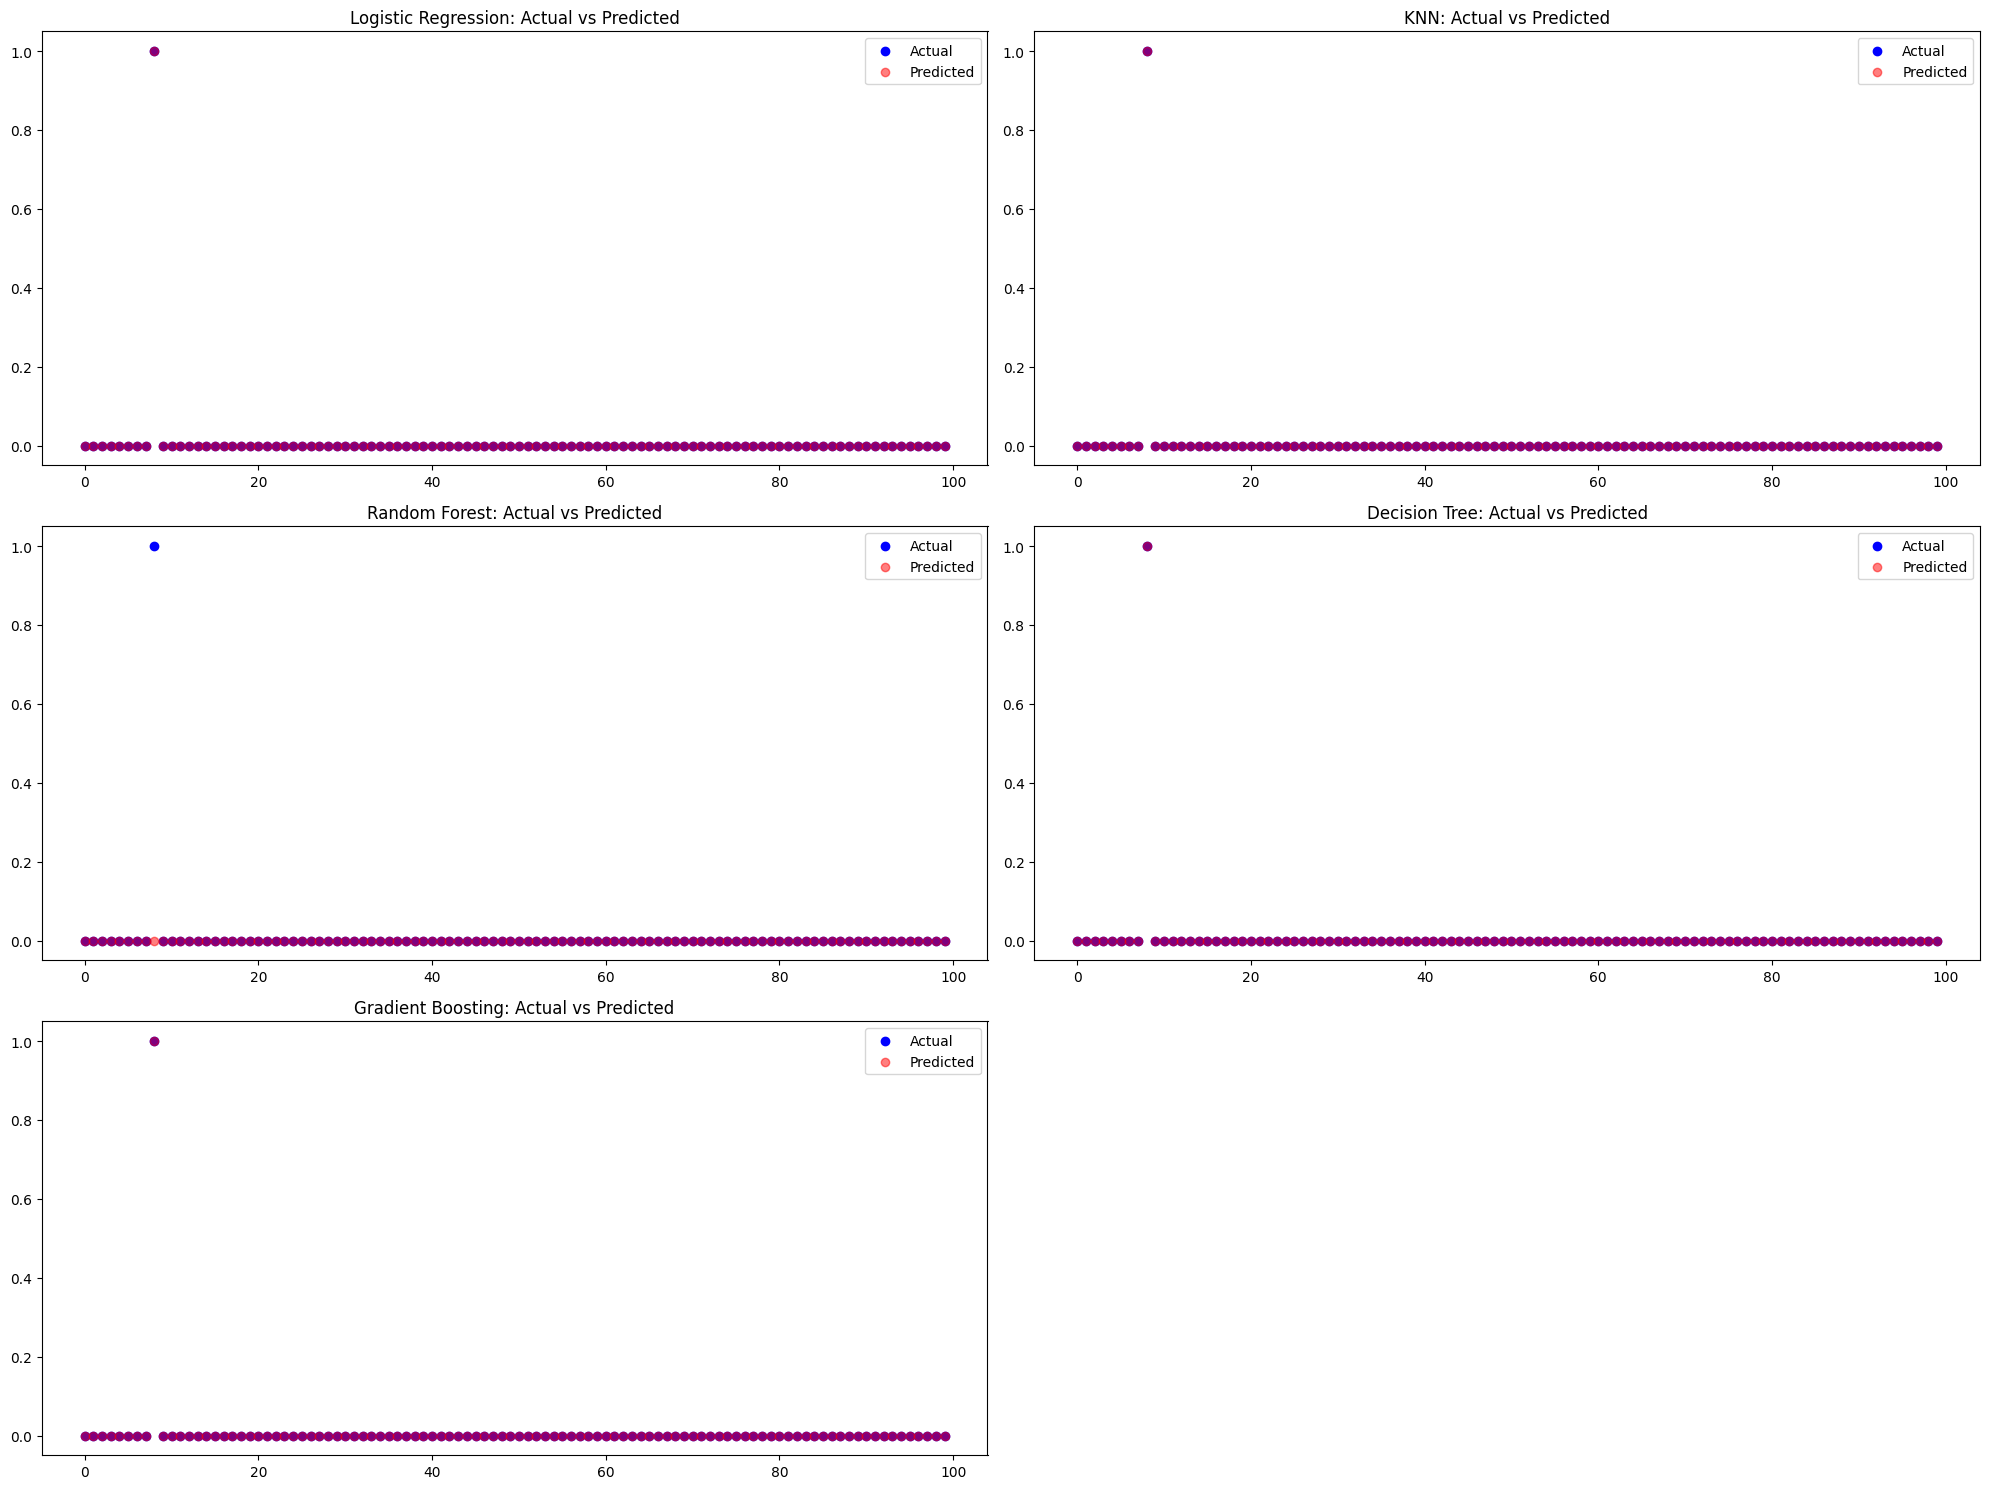

In [71]:
# Plot y_test vs y_pred for each model with a subset of the data
plt.figure(figsize=(20, 15))

plt.subplot(3, 2, 1)
plt.scatter(range(len(y_test[:100])), y_test[:100], color='blue', label='Actual')
plt.scatter(range(len(y_test[:100])), y_pred_lr[:100], color='red', alpha=0.5, label='Predicted')
plt.title('Logistic Regression: Actual vs Predicted')
plt.legend()

plt.subplot(3, 2, 2)
plt.scatter(range(len(y_test[:100])), y_test[:100], color='blue', label='Actual')
plt.scatter(range(len(y_test[:100])), y_pred_knn[:100], color='red', alpha=0.5, label='Predicted')
plt.title('KNN: Actual vs Predicted')
plt.legend()

plt.subplot(3, 2, 3)
plt.scatter(range(len(y_test[:100])), y_test[:100], color='blue', label='Actual')
plt.scatter(range(len(y_test[:100])), y_pred_rf[:100], color='red', alpha=0.5, label='Predicted')
plt.title('Random Forest: Actual vs Predicted')
plt.legend()

plt.subplot(3, 2, 4)
plt.scatter(range(len(y_test[:100])), y_test[:100], color='blue', label='Actual')
plt.scatter(range(len(y_test[:100])), y_pred_dt[:100], color='red', alpha=0.5, label='Predicted')
plt.title('Decision Tree: Actual vs Predicted')
plt.legend()

plt.subplot(3, 2, 5)
plt.scatter(range(len(y_test[:100])), y_test[:100], color='blue', label='Actual')
plt.scatter(range(len(y_test[:100])), y_pred_gb[:100], color='red', alpha=0.5, label='Predicted')
plt.title('Gradient Boosting: Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()


### Describe your fraud detection model in elaboration.
1.In my fraud detection model , I used various techniques to firstly clean the data , remove outliers , etc .</br>
2.I also used Label Encoder to convert categorical data into numerical data so as to perform futher tasks.</br>
3.Then , I proceeded on to Data Visualization to gain more insights about the data. </br>
4.After that , I performed feature selection process in which the features which were correlated more to our target variable were determined. </br>
5.Thus , only these features were used for building our model . </br>
6.Before the model development stage , train_test_split was performed to divide the data into train set and test set.</br>
7.Then different machine learning classification models were used to get the best possible accuracy.</br>
8.After building the models, hyperparameters tuning was done for further improvements.

#### How did you select variables to be included in the model?
For selecting the variables , I used visualizations and correlation to determine the features which were related to our target variable the most.

#### Demonstrate the performance of the model by using best set of tools.
We determined the performance of the models using techniques such as accuracy_score , ROC AUC Score using which we determined that the Logistic Regression model performed the best with the following scores:</br>
Logistic Regression ROC-AUC Score: 0.9999442462087422</br>
Logistic Regression Confusion Matrix:</br>
 [[4482    2]</br>
 [   2   14]]</br>
Logistic Regression Accuracy Score: 0.9991111111111111</br>

#### What are the key factors that predict fraudulent customer?
The key factors that predict the fraudulent customers are:
**step**,**amount** , **type**, **isFlaggedFraud** ,**oldbalanceOrg**,**newbalanceOrig**

#### Do these factors make sense? If yes, How? If not, How not?
The factors : step ,amount, type and isFlaggedFraud makes more sense to me as these can distinguishly give the clue about the fraudulent transactions.</br>
The rest of the factors doesn't make sense to me because these factors may vary according to individual needs , situations and may align with Fraud transactions but doesn't distinguishly tell that a transaction is Fraudulent.

#### What kind of prevention should be adopted while company update its infrastructure?
The company should develop real time monitoring systems which keeps checks on factors such as timing(steps) , type and flagged status of the transactions.</br> Strengthen authentication mechanisms, especially for high-value transactions or transactions flagged as potentially fraudulent. </br>
Utilize machine kearning models to continuously train on historical data and predict the factors leading to fraudulent transactions.

#### Assuming these actions have been implemented, how would you determine if they work?
The best parameter according to me would be to check if the number of fraudulent transactions reduced. If so , these actions are working for the better.</br>
Other than that , we can check the detection rate of the fraudulent transactions.</br> 
It can also be determined by checking how these transactions impact the finincial state of the company . If the finicial loses reduced , these methods are working.